In [62]:
#importer les libraries
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from math import sqrt
import matplotlib.pyplot as plt

Text(0, 0.5, 'Al2O')

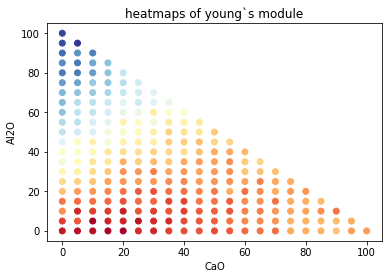

In [63]:
#importer data
dataset=pd.read_excel(r"C:/Users/eme_m/Downloads/CAS_simu_young.xlsx")
data=dataset.values
X=data[:,:-1]
Y=data[:,-1]
plt.scatter(X[:,0],X[:,1],c=Y,cmap='RdYlBu')
plt.title('heatmaps of young`s module')
plt.xlabel('CaO')
plt.ylabel('Al2O')

In [86]:
dataset.head()

,CaO,Al2O3,SiO2,E
0,0,0,100,79.447276
1,0,5,95,84.798098
2,5,0,95,78.219451
3,0,10,90,94.687479
4,5,5,90,87.943101


In [78]:
#DIVISER DATA
KFold(n_splits=10, random_state=None, shuffle=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)
print(X_train)
X_test.shape
print(Y_train)
Y_test.shape


[[ 45.   5.  50.]
 [  0.  45.  55.]
 [ 45.  40.  15.]
 [ 45.  10.  45.]
 [  5.  25.  70.]
 [ 65.   0.  35.]
 [ 45.  30.  25.]
 [  5.   5.  90.]
 [ 50.  15.  35.]
 [ 30.  20.  50.]
 [ 20.  50.  30.]
 [ 35.  10.  55.]
 [  0.  55.  45.]
 [ 25.   5.  70.]
 [ 15.  65.  20.]
 [ 70.  25.   5.]
 [ 20.  20.  60.]
 [ 15.   5.  80.]
 [  0.  10.  90.]
 [  5.  60.  35.]
 [ 15.  15.  70.]
 [ 10.  25.  65.]
 [ 30.  45.  25.]
 [ 25.  25.  50.]
 [  5.  45.  50.]
 [ 45.  35.  20.]
 [ 10.  60.  30.]
 [ 20.   5.  75.]
 [100.   0.   0.]
 [ 70.  10.  20.]
 [ 45.   0.  55.]
 [ 65.  25.  10.]
 [ 10.  50.  40.]
 [ 30.  15.  55.]
 [ 30.  55.  15.]
 [ 25.  60.  15.]
 [ 65.   5.  30.]
 [ 40.  20.  40.]
 [ 85.  10.   5.]
 [ 40.  40.  20.]
 [ 50.  40.  10.]
 [ 55.  35.  10.]
 [ 25.  15.  60.]
 [ 20.   0.  80.]
 [ 30.   0.  70.]
 [ 25.  20.  55.]
 [ 90.   5.   5.]
 [ 25.   0.  75.]
 [  0.  85.  15.]
 [  5.  40.  55.]
 [ 20.  65.  15.]
 [ 80.  20.   0.]
 [ 70.   5.  25.]
 [ 40.  45.  15.]
 [ 35.  15.  50.]
 [ 10.  75

(58,)

In [79]:
lin_Regression=LinearRegression()
lin_Regression.fit(X_train,Y_train)
#Faire des prédictions
Y_pred=lin_Regression.predict(X_test)
Y_train_pred=lin_Regression.predict(X_train)



In [80]:
#Calcul des erreurs
print('MAE :',mean_absolute_error(Y_test,Y_pred))
print('MSE :',mean_squared_error(Y_test,Y_pred))
print('MAAE :',median_absolute_error(Y_test,Y_pred))


MAE : 6.058036885953179
MSE : 50.717724211221125
MAAE : 5.720684687373534


In [81]:

MSE=mean_squared_error(Y_test,Y_pred)
RMSE=sqrt(MSE)
#calcul du coef de détermination
r2=r2_score(Y_test,Y_pred)
print('RMSE=', RMSE ,'R2=',r2)

RMSE= 7.121637747823258 R2= 0.8365151920926297


In [82]:
MSE=mean_squared_error(Y_train,Y_train_pred)
RMSE=sqrt(MSE)
r2_1=r2_score(Y_train,Y_train_pred)
print('RMSE=', RMSE ,'R2=',r2_1)

RMSE= 5.940171391467296 R2= 0.869023770754022


In [83]:
# =============================================================================
#                 Polynomial regression training set
# =============================================================================
from sklearn.preprocessing import PolynomialFeatures
i=0
RMSE=[]
degrees=[1,2,3,4,5,6,7,8,9,10]
while i <10 :
    poly_reg=PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_poly_train,X_poly_test =poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    regressor_poly=LinearRegression()
    regressor_poly.fit(X_poly_train,Y_train)
    
    Y_poly_pred=regressor_poly.predict(X_poly_train)
                                       
    r2_poly=r2_score(Y_train,Y_poly_pred)
                                       
    MSE=mean_squared_error(Y_train,Y_poly_pred)
    RMSE.append(sqrt(MSE))
    
    print('RMSE=', RMSE ,'R2=',r2_poly , 'degrees=',degrees[i])
    i=i+1

RMSE= [5.940171391467296] R2= 0.869023770754022 degrees= 1
RMSE= [5.940171391467296, 2.9551203246768165] R2= 0.967585086334975 degrees= 2
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079] R2= 0.9777161425054134 degrees= 3
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079, 2.356073024533079] R2= 0.979395028162687 degrees= 4
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079, 2.356073024533079, 2.2990154388548634] R2= 0.980380934960433 degrees= 5
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079, 2.356073024533079, 2.2990154388548634, 2.197294335687045] R2= 0.9820786383561535 degrees= 6
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079, 2.356073024533079, 2.2990154388548634, 2.197294335687045, 2.169313066180652] R2= 0.982532168431932 degrees= 7
RMSE= [5.940171391467296, 2.9551203246768165, 2.450179604987079, 2.356073024533079, 2.2990154388548634, 2.197294335687045, 2.169313066180652, 2.1668632952610154] R2= 0.982571598

In [84]:
# =============================================================================
#                 Polynomial regression testing set
# =============================================================================
from sklearn.preprocessing import PolynomialFeatures
i=0
RMSEt=[]
degrees=[1,2,3,4,5,6,7,8,9,10]
while i < 10 :
    poly_reg=PolynomialFeatures(degree=degrees[i], include_bias=False)
    X_poly_train,X_poly_test =poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    regressor_poly=LinearRegression()
    regressor_poly.fit(X_poly_train,Y_train)
    
    Y_poly_pred=regressor_poly.predict(X_poly_test)
    
    r2_poly=r2_score(Y_test,Y_poly_pred)
    MSE=mean_squared_error(Y_test,Y_poly_pred)
    RMSEt.append(sqrt(MSE))
    print('RMSEt=', RMSEt ,'R2=',r2_poly , 'degrees=',degrees[i])
    i=i+1

RMSEt= [7.121637747823258] R2= 0.8365151920926297 degrees= 1
RMSEt= [7.121637747823258, 3.181456899728144] R2= 0.9673735567751413 degrees= 2
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367] R2= 0.9798034054426437 degrees= 3
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367, 2.430323655577138] R2= 0.9809609238108202 degrees= 4
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367, 2.430323655577138, 2.4130010607376704] R2= 0.9812313658352135 degrees= 5
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367, 2.430323655577138, 2.4130010607376704, 2.7226931242775563] R2= 0.9761045599482964 degrees= 6
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367, 2.430323655577138, 2.4130010607376704, 2.7226931242775563, 2.7377482174323613] R2= 0.9758395703439315 degrees= 7
RMSEt= [7.121637747823258, 3.181456899728144, 2.503111824615367, 2.430323655577138, 2.4130010607376704, 2.7226931242775563, 2.7377482174323613, 2.8685750079306107] R2= 

Text(0, 0.5, 'RMSE')

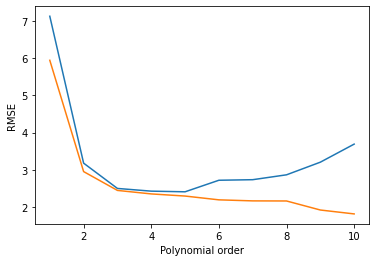

In [85]:
plt.plot(degrees,RMSEt)
plt.plot(degrees,RMSE)
plt.xlabel('Polynomial order')
plt.ylabel('RMSE')